# Working thru Software Receiver Design

On to Chapter 2

## Synchronization notes
Places where sync can occur (all on receiver side):
* Symbol phase sync (when within the interval $T$ to sample)
* Symbol freq sync (accounts for difference in oscilators at transmit and receive)
* Carrier phase sync
* Carrier freq sync
* Frame sync (finding the start of each message block

## Equalization
Filtering to minimize the effects of intersymbol interference and frequency selective fading.

## Coding and Decoding
Coding is often making data redundant within a transmission. Coding is often making data redundant within a transmission. :P We'll look into Huffman code which makes frequent symbols shorter and infrequent symbols longer (like Morse code) 

Definitions:
1. intersymbol interference - because of the transmission channel, multiple copies of the symbols (each scaled differently) show up at the receiver.
2. frequency selective fading - the channel may atenuate different frequencies by different amounts (fast fading)
3. channel capacity - the number of bits that can be sent in a certain bandwidth
4. linear block codes - cluster symbols together and then add extra bits (e.g., parity bits)

## Chapter 3
Looks like more notes, not much coding.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


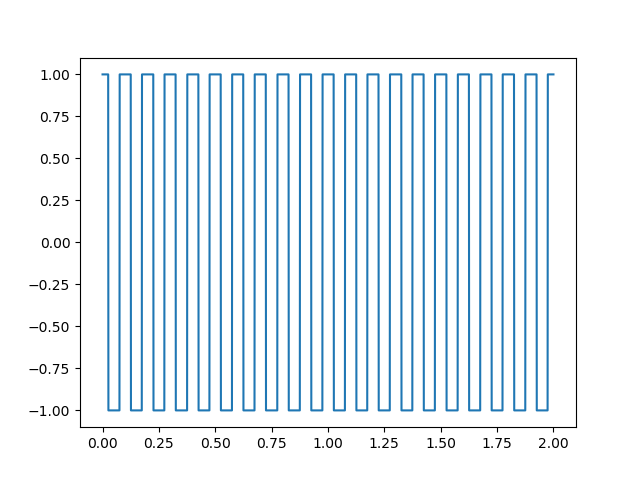

In [6]:
## from listing 3.1, specsquare.m
f = 10
time = 2
Ts = 1.0/1000
t = np.linspace(0,time,int(time/Ts)+1)
#print(t)
x = np.sign( np.cos(2*np.pi * f * t) )

plt.plot(t,x)
plt.show()

<IPython.core.display.Javascript object>


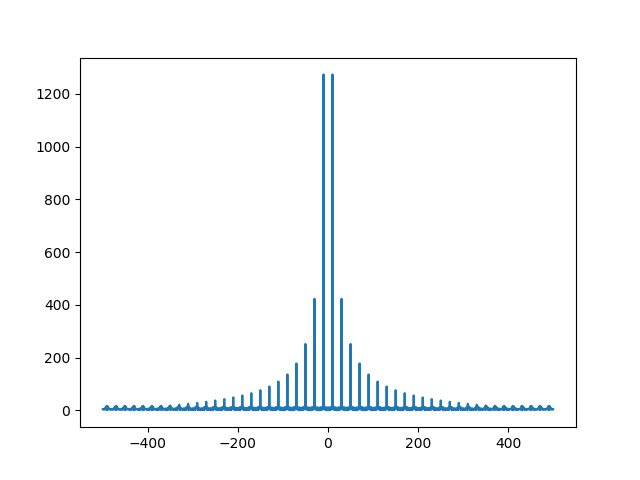

In [7]:
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)

plt.plot(freq, abs(fourier))
plt.show()

<IPython.core.display.Javascript object>


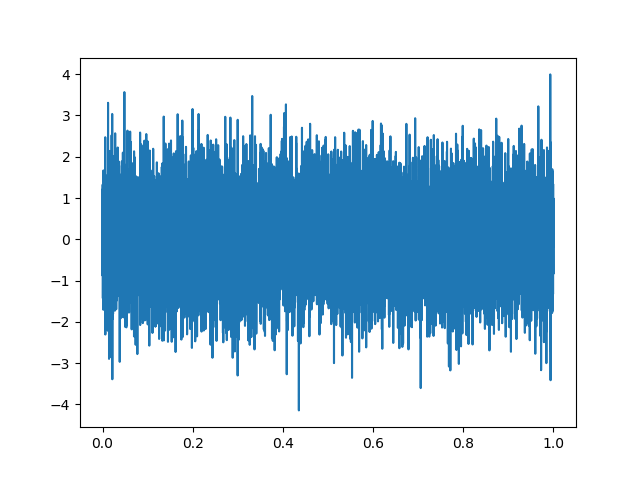

In [8]:
## from listing 3.2 specnoise.m
time = 1
Ts = 1.0/10000
t = np.linspace(0,time,int(time/Ts)+1)
x = np.random.randn(len(t))

plt.plot(t,x)
plt.show()

<IPython.core.display.Javascript object>


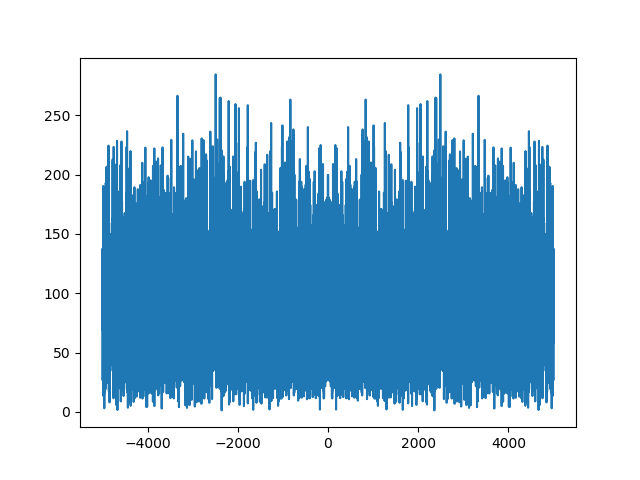

In [9]:
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)

plt.plot(freq, abs(fourier))
plt.show()

<IPython.core.display.Javascript object>


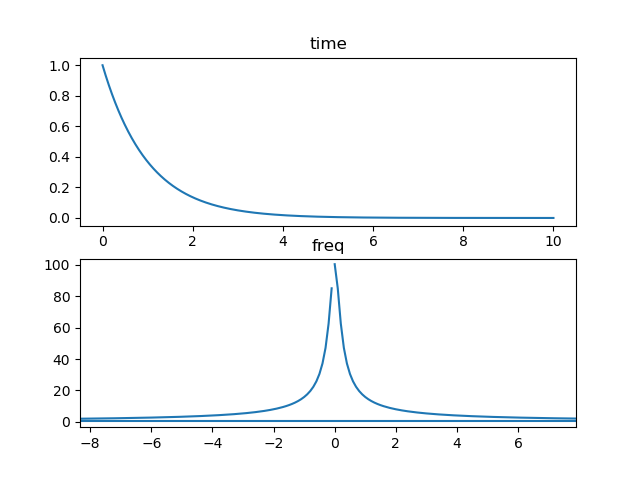

In [10]:
## exercise 3.3 a.  An exponential pulse
time = 10
Ts = 1.0/100
t = np.linspace(0,time,int(time/Ts)+1)
#print(t)
x = np.exp(-1*t) ## e^{-t}

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

<IPython.core.display.Javascript object>


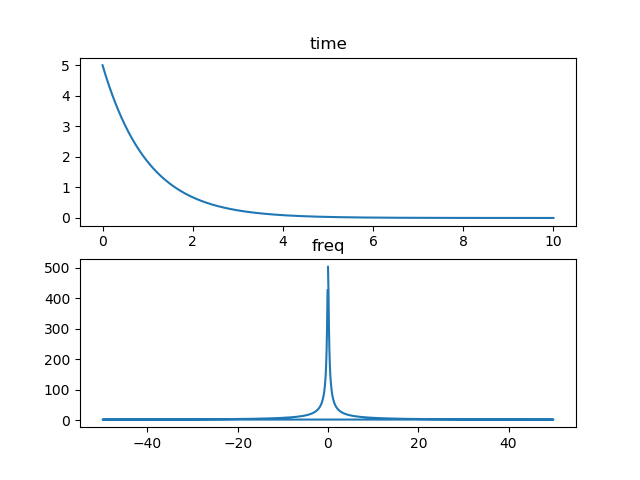

In [11]:
## exercise 3.3 b.  A scaled exponential pulse s(t) = 5e^{-t}
time = 10
Ts = 1.0/100
t = np.linspace(0,time,int(time/Ts)+1)
#print(t)
x = 5*np.exp(-1*t) ## e^{-t}

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

3.3 a. and b. shows that the amplitude of the fft output is scaled by the input

<IPython.core.display.Javascript object>


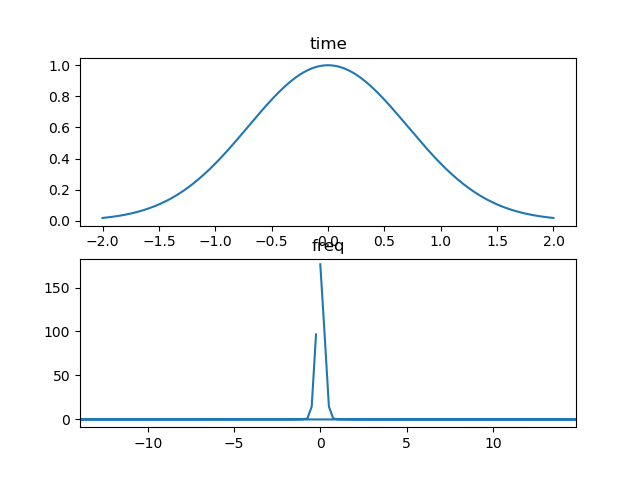

In [12]:
## exercise 3.3 c.  A Gaussian Pulse s(t) = e^{-t^2}
time = 4
Ts = 1.0/100
t = np.linspace(-2, time-2, int(time/Ts)+1)
#print(t)
x = np.exp(-1* np.power(t, 2)) ## e^{-t^2}

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

<IPython.core.display.Javascript object>


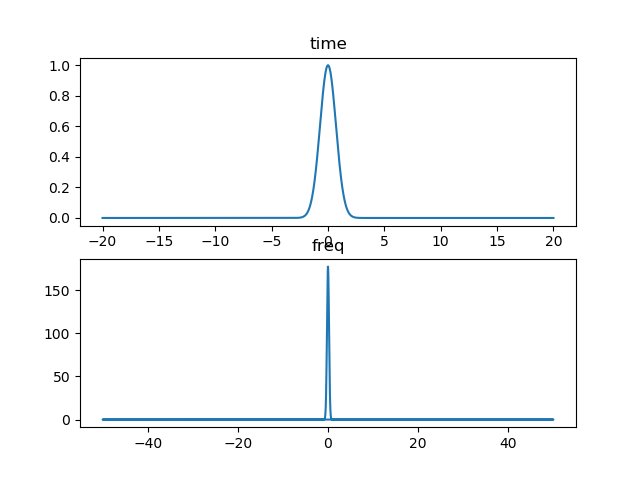

In [13]:
## exercise 3.3 4.  A Gaussian Pulse s(t) = e^{-t^2} larger interval
time = 40
Ts = 1.0/100
t = np.linspace(-20, time-20, int(time/Ts)+1)
#print(t)
x = np.exp(-1* np.power(t, 2)) ## e^{-t^2}

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()

<IPython.core.display.Javascript object>


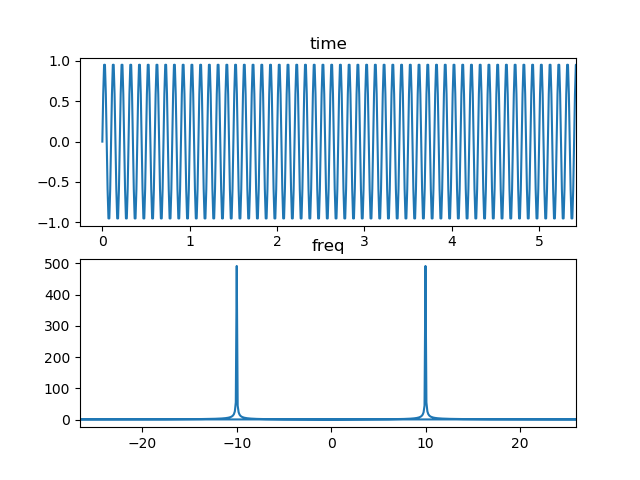

In [15]:
## exercise 3.3 e.  sinusoid s(t) = sin(2pi*f*t + phi) f = 10, phi = 0
time = 10
Ts = 1.0/100
f = 10
t = np.linspace(0, time, int(time/Ts)+1)
#print(t)
phi = 0
x = np.sin(2*np.pi * f * t + phi)

fig, axs = plt.subplots(2, 1)
## plot time
axs[0].plot(t,x)
axs[0].set_title("time")
fourier = np.fft.fft(x)
n = len(x)
freq = np.fft.fftfreq(n, d=Ts)
## plot freq
axs[1].plot(freq, abs(fourier))
axs[1].set_title("freq")

plt.show()